In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

In [5]:
X_train = pd.read_excel('Database-settlement.xlsx', sheet_name=1).drop('Ring No.', axis=1)
X_test = pd.read_excel('Database-settlement.xlsx', sheet_name=2).drop('Ring No.', axis=1)


In [16]:
X = pd.concat([X_train, X_test]).sort_index()
y = X['S']

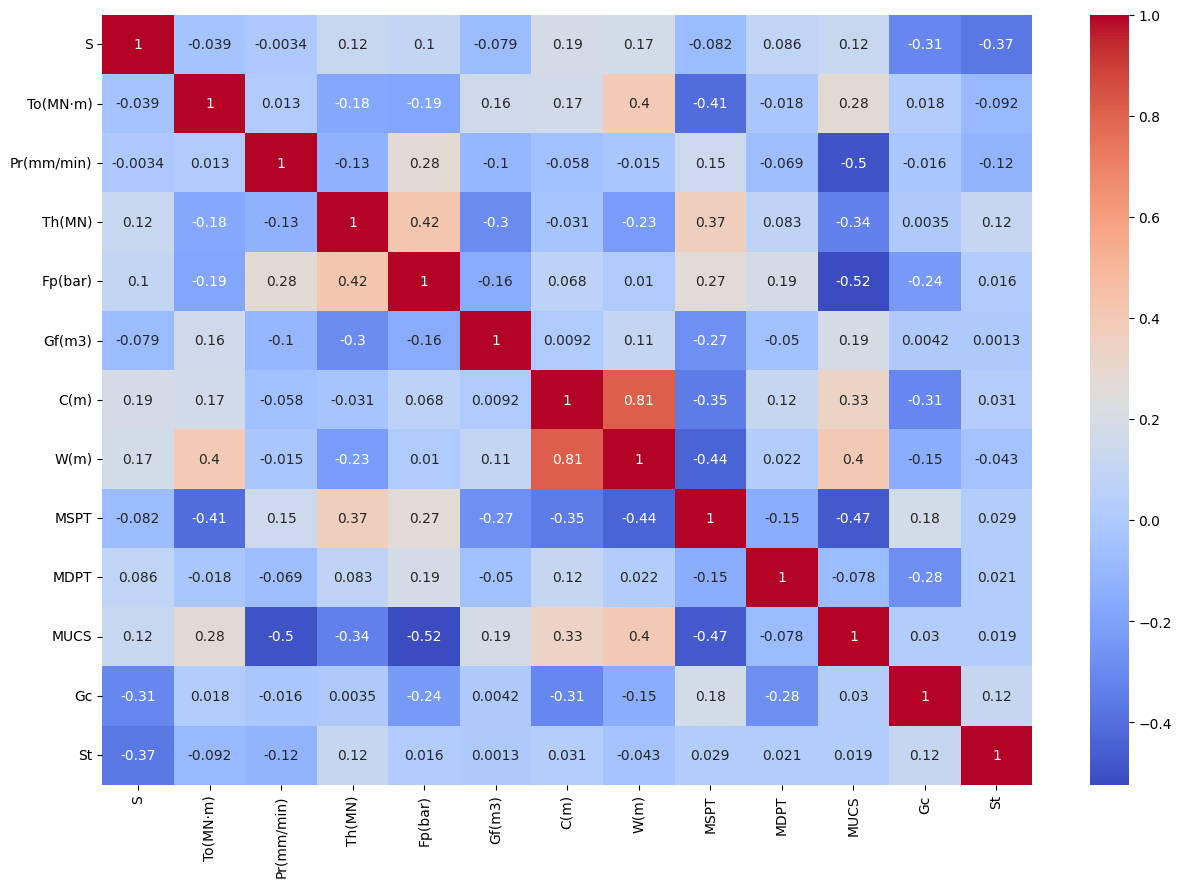

In [17]:
import seaborn as sns
corr_matrix = X.corr(method='pearson')
plt.figure(figsize=(15, 10),)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')      
plt.show()


Note:	
To	Torque
Pr	penetration rate
Th	Thrust
Fp	Face pressure
Gf	Grouting ratio
C	Cover depth
W	Water table
MSPT	Modified standard penetration test
MDPT	Modified dynamic penetration test
MUCS	Modified uniaxial compressive strength
Gc	Ground condition at the tunnel face
St	Stoppage

In [18]:
X_train.describe()

,S,To(MN·m),Pr(mm/min),Th(MN),Fp(bar),Gf(m3),C(m),W(m),MSPT,MDPT,MUCS,Gc,St
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,-4.376130,2.394453,23.098006,13.127730,1.084680,6.024153,17.452669,11.804237,6.732837,0.397486,6.847549,3.016949,0.093220
std,5.846818,0.801576,9.541879,3.769969,0.523534,0.957506,3.355337,4.446147,8.464396,1.405612,8.152968,0.460953,0.291359
min,-31.630000,0.285000,2.414493,7.000000,0.000000,4.000000,9.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-5.155000,1.886419,16.798246,10.475000,0.700000,6.000000,15.487500,9.500000,1.064553,0.000000,0.206711,3.000000,0.000000
50%,-2.795000,2.369223,25.370092,12.400000,1.100000,6.000000,16.800000,11.450000,3.202518,0.000000,2.469678,3.000000,0.000000
75%,-0.855000,3.000000,29.411765,15.480870,1.500000,6.500000,20.400000,14.700000,7.752042,0.000000,13.681721,3.000000,0.000000
max,3.050000,4.700000,45.833333,24.200000,2.500000,13.100000,26.350000,20.300000,38.715750,12.443165,36.304800,4.000000,1.000000


In [19]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [20]:
X_train.columns

Index(['S', 'To(MN·m)', 'Pr(mm/min)', 'Th(MN)', 'Fp(bar)', 'Gf(m3)', 'C(m)',
       'W(m)', 'MSPT', 'MDPT', 'MUCS', 'Gc', 'St'],
      dtype='object')

In [21]:
y_train = X_train['S']
y_test = X_test['S']

In [22]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE: 1.9652800691127223
R2: 0.9241316981065582


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
results = cross_val_score(rf_model, X, y, cv=kfold,scoring= 'r2')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 98.21% (3.61%)


In [24]:
rf_model.fit(X_train,y_train)   
y_pred = rf_model.predict(X_test)
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE: 2.3003676878668338
R2: 0.8960544308835982
